<div class="alert alert-block alert-info">
    
**Цель данного исследования:**
    
    * изучить рынок недвижимости Санкт-Петербурга и соседних населенных пунктов.
    
**Задачи данного исследования:**
    
    * определить рыночную стоимость объектов недвижимости
    * установить факторы, которые больше всего влияют на стоимость объектов
    * выявить аномальные данные и определить, чем они вызваны
    
    
</div>

### Откройте файл с данными и изучите общую информацию

In [1]:
#загрузка необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
realty = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

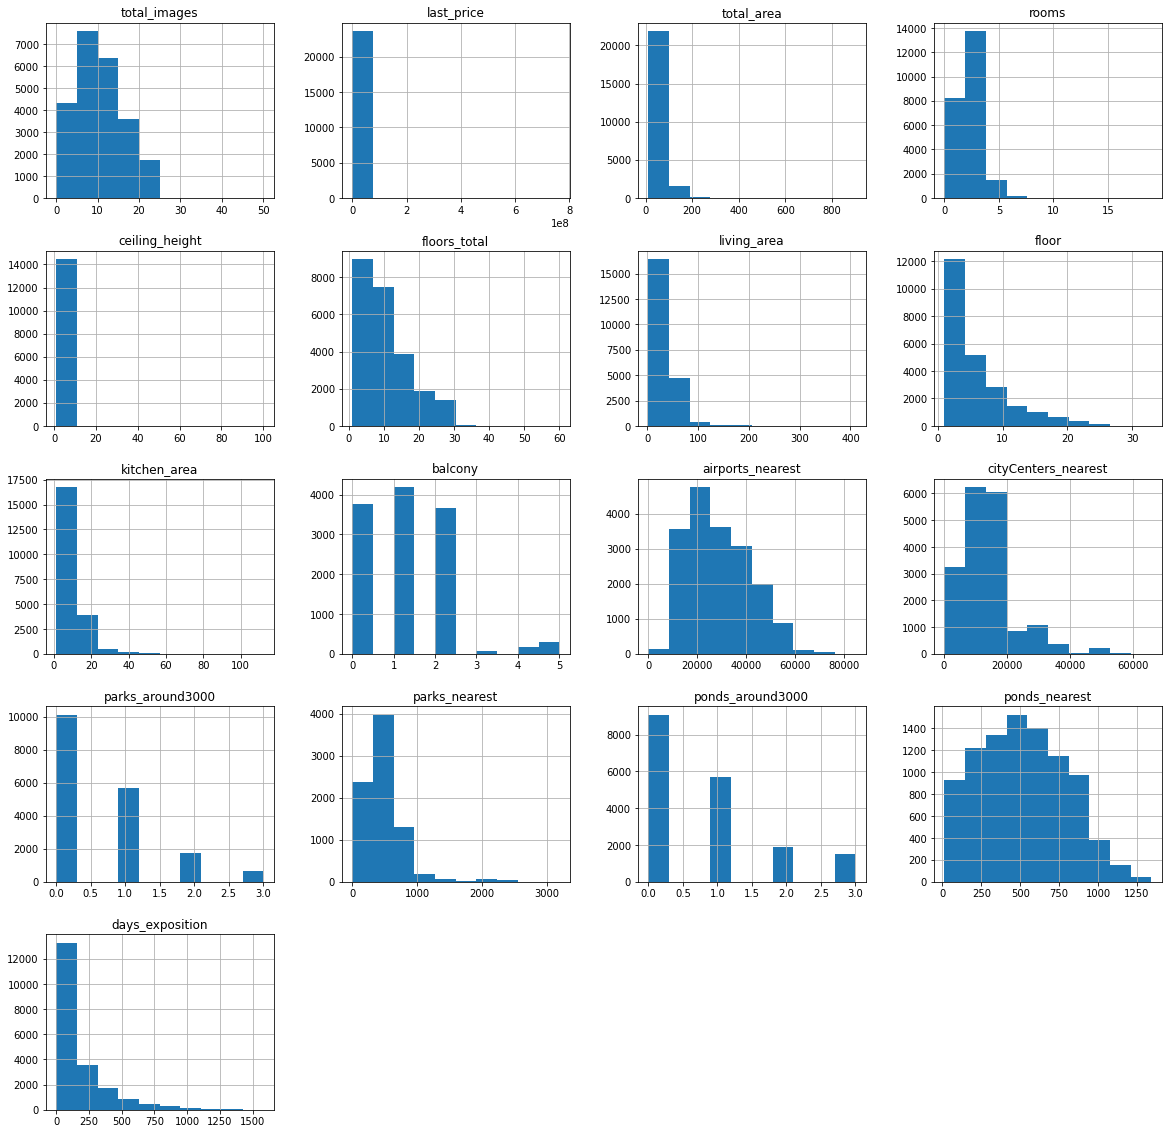

In [3]:
realty.hist(figsize = (20,20))
plt.show()

*Изучила общую информацию по данным.* 

Вижу, что часть столбцов заполнены полностью, в части столбцов - данных не хватает (ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition). 

Займусь заполнением пропущенных данных.

### Выполните предобработку данных

<h4> Обработаем пропуски в данных

Меньше всего пропущено значений в столбце **"Населенный пункт" (locality_name)**. 

Посмотрю на эти строки с пропусками, чтобы понять, можно ли их удалить безболезненно или лучше их оставить.

In [4]:
realty.loc[realty['locality_name'].isna() == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,...,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Видно, что строки хорошо, плотно заполнены данными, поэтому чтобы не потерять эти значения для будущего исследования, заполним пропуски в столбце "Населенный пункт" (locality_name) - "unknown"

In [5]:
realty['locality_name'] = realty['locality_name'].fillna('unknown')

**Дальше**
* Думаю, если люди не указали число балконов, то логично предположить, что их в квартире нет, поэтому в столбце "Балконы" пропуски заменю на 0.
* Думаю, что если по геоданным не удалось указать число парков и водоемов в 3 км от квартиры, то возможно их или нет совсем, или они настолько незначительны, что не обозначены на картах. Значит там, где пропущены эти данные можно заполнить 0.
<div class="alert alert-block alert-info"> * Но пропущенные данные в столбцах parks_nearest и ponds_nearest невозможно заполнить логически понятными значениями,поэтому оставим пропуски в этих столбцах. </div>

Эти размышления помогут заполнить пропущенные данные в столбцах: balcony, parks_around3000, ponds_around3000

In [6]:
realty['balcony'] = realty['balcony'].fillna(0)
realty['parks_around3000'] = realty['parks_around3000'].fillna(0)
realty['ponds_around3000'] = realty['ponds_around3000'].fillna(0)

Заполнить пропуски в столбце **"Высота потолков" (ceiling_height)** логичнее всего или средним, или медианным значением. Посмотрю данные об этом столбце:

In [7]:
realty['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Максимальное значение высоты потолков указано 100 м, это явная ошибка в данных, поработаю с ней позже. Но из-за этого не буду заполнять пропуски средним значением, т.к. оно искажено выбросом. 75% данных находится в приемлемых границах, да и медиана выглядит разумно, поэтому заполню пропуски медианным значением. 

In [8]:
realty['ceiling_height'] = realty['ceiling_height'].fillna(realty['ceiling_height'].median())

Посмотрим на значения в столбце **"Апартаменты" (is_apartment)**

In [9]:
realty['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Думаю, все, кто продает апартаменты, это указал (True), т.к. это важная информация для продажи. Поэтому думаю логично заполнить пропуски значением False.

In [10]:
realty['is_apartment'] = realty['is_apartment'].fillna(False)

Теперь посмотрим на пропуски в столбце **"Этажность дома" (floors_total)**. 

In [11]:
realty['floors_total'].count()

23613

<div class="alert alert-block alert-info">
Здесь пропусков очень мало, и логически их заполнить невозможно, поэтому оставим столбец без изменений
</div>

Следующим шагом займусь заполнением пропусков в столбцах **"Жилая площадь" (living_area) и "Площадь кухни" (kitchen_area)**.

* сгруппирую данные по количеству комнат
* вычислю для каждой группы медианное значение "Жилой площади" (living_area) и "Площади кухни" (kitchen_area)
* заполню этими характерными значениями пропуски по тем же группам

In [12]:
for r in realty['rooms'].unique():
    if r != 0:
        realty.loc[(realty['rooms'] == r) & (realty['living_area'].isna()),'living_area'] \
        = realty.loc[(realty['rooms'] == r), 'living_area'].median()
        realty.loc[(realty['rooms'] == r) & (realty['kitchen_area'].isna()),'kitchen_area'] \
        = realty.loc[(realty['rooms'] == r), 'kitchen_area'].median()

realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23685 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23502 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [13]:
realty_null = realty.loc[(realty['living_area'].isna() == True) | realty['kitchen_area'].isna() == True ]
realty_null

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.30,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,NaN,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,0.0,NaN,0.0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.65,24.0,18.00,4,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,NaN,8,False,...,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.65,9.0,18.00,8,False,...,NaN,2.0,Никольское,NaN,NaN,0.0,NaN,0.0,NaN,82.0


<div class="alert alert-block alert-info">
Есть подозрение, что значения в столбцах living_area и kitchen_area пропущены в тех строках, где rooms = 0. Проверим это.
    </div>

In [14]:
realty.loc[(realty['living_area'].isna() == True) | realty['kitchen_area'].isna() == True ].value_counts('rooms')

rooms
0    197
dtype: int64

<div class="alert alert-block alert-info">
Так и есть. Поэтому-то мы не можем вычислить медианные значения столбцов living_area и kitchen_area там, где rooms = 0. 

Скорее всего число комнат указано 0, если это квартира-студия или квартира свободной планировки. 

Проверим, принимают ли значения True столбцы studio и open_plan в датасете realty_null.
</div>

In [15]:
realty_null.loc[(realty_null['studio'] == True) | realty_null['open_plan'] == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,False,...,NaN,0.0,деревня Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,False,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.30,19,False,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.65,10.0,NaN,7,False,...,NaN,0.0,посёлок Шушары,NaN,NaN,0.0,NaN,0.0,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,False,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.65,24.0,18.00,4,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,2.65,19.0,NaN,8,False,...,NaN,0.0,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.65,9.0,18.00,8,False,...,NaN,2.0,Никольское,NaN,NaN,0.0,NaN,0.0,NaN,82.0


<div class="alert alert-block alert-info">
Да, подозрение подтвердилось. Количество комнат указано 0 в квартирах-студиях и квартирах со свободной планировкой.

Поискала в интернете, нашла вот какую информацию:
"К жилой площади относят все комнаты, исключение квартира-студия: в этом случае из жилой площади исключается только туалет и ванная"
А так же нашла формулу:
* Общая площадь - ОП, Жилая площадь - ЖП, Площадь кухни - К

К + ЖП = ОП - 0.2хОП (20% - это как раз туалет и ванная)

По собственным соображениям Кухня пусть будет 40%, Жилая площадь 60%

По этой формуле рассчитаю, и заполню оставшиеся пропуски в столбцах kitchen_area и living_area. 
    </div>

In [16]:
realty['living_area'] = realty['living_area'].fillna((realty['total_area']*0.8)*0.6)
realty['kitchen_area'] = realty['kitchen_area'].fillna((realty['total_area']*0.8)*0.4)

In [17]:
realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Пропуски остались в столбцах **"Расстояние до аэропорта" (airports_nearest), "Расстояние до центра города" (cityCenters_nearest), "Количество дней размещения объявления" (days_exposition)**. 

Думаю эти пропуски невозможно заполнить логически понятными значениями, т.к. для этого недостаточно данных: например, нужны координаты расположения квартиры, чтобы вычислить расстояние до аэропорта и центра города, а также нужна дата снятия объявления, чтобы вычислить количество дней размещения объявления.


**Теперь все возможные пропуски заполнены.**

<div class="alert alert-block alert-info">
<h3> Вывод:  <a class="tocSkip"></h3> 
    
   *Я заполнила пропуски в столбцах:* 
   
    ceiling_height 
    living_area 
    is_apartment 
    kitchen_area 
    balcony 
    locality_name 
    parks_around3000 
    ponds_around3000 
 
   *Я оставила пропуски в столбцах:* 
   
    floors_total 
    airports_nearest 
    cityCenters_nearest 
    parks_nearest 
    ponds_nearest 
    days_exposition
    
* Пропуски в некоторых столбцах связаны с человеческим фактором - люди не заполнили эти данные (ceiling_height, living_area, kitchen_area, balcony, is_apartment, locality_name, floors_total) 
* В других столбцах пропуски связаны с работой геосервисов. Скорее всего им не хватило данных, таких как координаты квартир, чтобы заполнить количество рядом парков и водоемов и указать удаленность от различных объектов (аэропортов, центра города, парков и водоемов)
* Пропуски в столбце days_exposition скорее всего связаны с тем, что объявления еще были активны на момент выгрузки датасета.
    
</div>

<h4>Приступим к изменению типа данных в столбцах

В столбцах floors_total, balcony, parks_around3000, ponds_around3000, days_exposition данные представлены типом float, их нужно перевести в тип int. 

Если данные по своей природе есть числа целые (число балконов, парков, водоемов, этажей), то их нужно приводить к этому типу данных.

In [18]:
realty['floors_total'] = realty['floors_total'].astype('int',errors = 'ignore')
realty['balcony'] = realty['balcony'].astype('int')
realty['parks_around3000'] = realty['parks_around3000'].astype('int')
realty['ponds_around3000'] = realty['ponds_around3000'].astype('int')
realty['days_exposition'] = realty['days_exposition'].astype(int,errors = 'ignore')

Теперь поработаем со столбцом "Дата публикации" (first_day_exposition). Приведем формат даты к стандартному.

In [19]:
realty['first_day_exposition'] = pd.to_datetime(realty['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

<div class="alert alert-block alert-info">
В столбцах days_exposition и floors_total пропуски имеют тип float, поэтому тип столбца не изменился.
</div>

<h4>Приступим к выявлению и удалению дубликатов.

Посмотрим уникальные значения в столбце **"Населенный пункт" (locality_name)**

In [20]:
realty['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Первое, что бросается в глаза - это использование буквы ё. Из-за этого возникают дубликаты.


In [21]:
realty['locality_name'] = realty['locality_name'].str.replace('ё','е')

Также видно, что один и тот же населенный пункт имеет разные приписки - поселок, поселок городского типа, деревня, село и т.п.
Оставлю только названия самих населенных пунктов, уберу приписки.

In [22]:
realty['locality_name'] = realty['locality_name']. \
replace(['городского типа','поселок','деревня','село','городской','садовое товарищество', \
         'садоводческое некоммерческое товарищество','коттеджный','при железнодорожной станции','станции',' '],'', \
        regex = True)
realty['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'КрасныйБор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'НовоеДевяткино', 'Металлострой',
       'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский', 'НоваяРопша',
       'Павловск', 'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'Куттузи', 'Аннино', 'Ефимовский',
       'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское', 'КрасноеСело',
       'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово', 'НовыйСвет',
       'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'СосновыйБор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',
       'Алек

Может получилось не очень красиво, но зато точно в списке нет дубликатов, одни уникальные значения.

**Удалим явные дубликаты строк, если они есть**

In [23]:
realty.drop_duplicates().reset_index(drop = True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Таблица с данными готова к исследованию**

<div class="alert alert-block alert-info">
<h3> Вывод:  <a class="tocSkip"></h3> 
    
На этапе предобработки данных часть пропущенных значений логически удалось заполнить нулевыми или медианными значениями.
    
Часть столбцов так и остались с пропусками, потому что невозможно логически обосновать их заполнение.
    
Данные приведены к нужному типу - стандартный вид даты, int - целочисленные столбцы. Не удалось изменить тип двух столбцов на int, т.к. в них есть пропуски, которые имеют тип float
    
</div>

### Добавьте в таблицу новые столбцы

Добавим в таблицу следующие столбцы:
* цена одного квадратного метра
* день публикации объявления
* месяц публикации объявления
* год публикации объявления
* тип этажа квартиры
* рассстояние от центра города в километрах

In [24]:
realty['price_m2'] = (realty['last_price'] / realty['total_area']).round(2)

In [25]:
realty['weekday'] = realty['first_day_exposition'].dt.weekday
realty['month'] = realty['first_day_exposition'].dt.month
realty['year'] = realty['first_day_exposition'].dt.year

In [26]:
i=0
for floor in realty['floor']:
    if floor == 1:
        realty.loc[i,'type_floor'] = 'Первый'
    elif realty.loc[i,'floors_total'] == floor:
        realty.loc[i,'type_floor'] = 'Последний'
    else:
        realty.loc[i,'type_floor'] = 'Другой'
    i+=1

In [27]:
realty['cityCenters_nearest_km'] = (realty['cityCenters_nearest']*0.001).round(0)

### Проведите исследовательский анализ данных

<h4> Исследование данных столбцов "Общая площадь", "Жилая площадь", "Площадь кухни"

Построю гистограммы для перечисленных выше столбцов.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

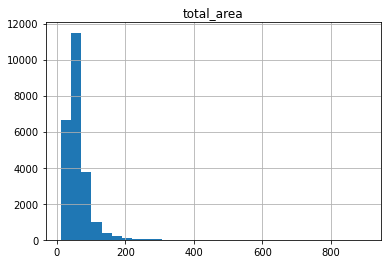

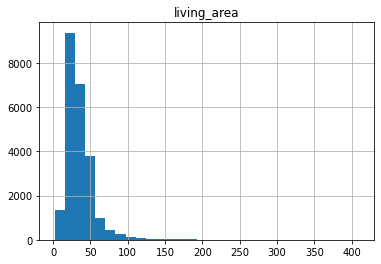

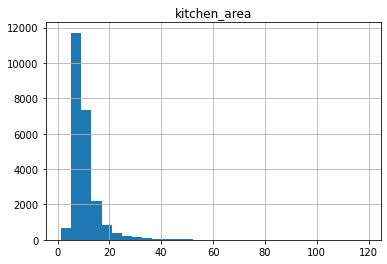

In [28]:
realty.hist(['total_area'], bins = 30, range = (realty['total_area'].min(),realty['total_area'].max()))
realty.hist(['living_area'],bins = 30, range = (realty['living_area'].min(),realty['living_area'].max()))
realty.hist(['kitchen_area'],bins = 30, range = (realty['kitchen_area'].min(),realty['kitchen_area'].max()))

Представленным выше гистограммам я задавала границы графика от минимального до максимального значения в соответствующем столбце. 

Видно, что большая часть значений в столбце:

    "Общая площадь" лежит в промежутке (0;250)
    "Жилая площадь" лежит в промежутке (0;170)
    "Площадь кухни" лежит в промежутке (0;50)
    
Остальных значений единицы, поэтому удалю их. Затем снова построю гистограммы.

<div class="alert alert-block alert-info">
Буду смотреть, какой процент данных удаляется на каждом этапе. Для этого сохраню исходную таблицу с данными  и создам вспомогательную функцию.
    </div>

In [29]:
realty_original = realty

In [30]:
def percent (df):
    per = 100.0 - len(df)/len(realty_original)*100.0
    return print('Процент удаленных строк на данный момент: ', per, '%')

In [31]:
#realty = realty_original

In [32]:
realty_percent = realty.query('total_area < 250')
realty_percent = realty_percent.query('living_area < 170')
realty_percent = realty_percent.query('kitchen_area < 50')

#проверка сколько данных удалили от изначального объема данных (везде буду использовать столбец 'total_area', т.к. в нем изначально не было пропусков)
percent(realty_percent)

Процент удаленных строк на данный момент:  0.7004514958437085 %


array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

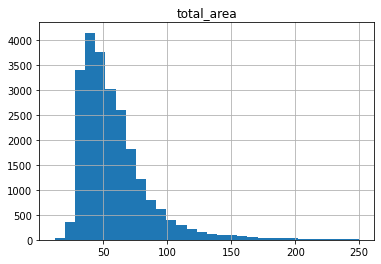

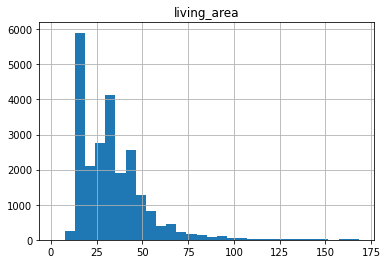

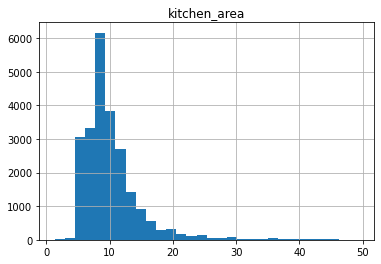

In [34]:
realty.hist(['total_area'], bins = 30, range = (realty['total_area'].min(),realty['total_area'].max()))
realty.hist(['living_area'],bins = 30, range = (realty['living_area'].min(),realty['living_area'].max()))
realty.hist(['kitchen_area'],bins = 30, range = (realty['kitchen_area'].min(),realty['kitchen_area'].max()))

<h4> Исследование данные столбцов "Количестое комнат в квартире", "Количество этажей в доме"

Построю гистограммы для этих столбцов.

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

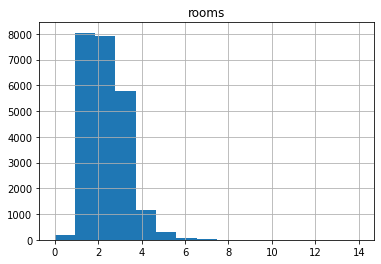

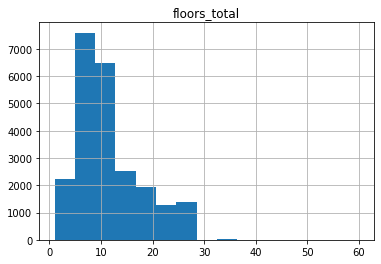

In [35]:
realty.hist(['rooms'],bins = 15,range = (realty['rooms'].min(),realty['rooms'].max()))
realty.hist(['floors_total'],bins = 15,range = (realty['floors_total'].min(),realty['floors_total'].max()))

Видно, что большая часть значений в столбце:

    * "Число комнат" лежит в промежутке (0;8)
    * "Этажность дома" лежит в промежутке (0;30)

Со значениями в этих столбцах поступим так же, как с площадями - удалим. Контролируем процент удаленных строк.

In [36]:
realty_percent = realty.query('rooms < 8')
realty_percent = realty_percent.query('floors_total < 30')

#проверка сколько данных удалили от изначального объема данных
percent(realty_percent) 

Процент удаленных строк на данный момент:  1.2405586733617469 %


In [37]:
realty = realty_percent

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

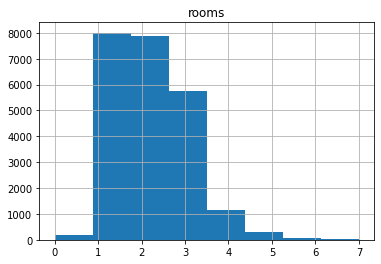

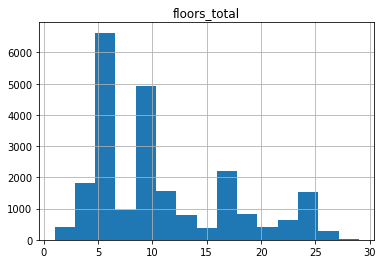

In [38]:
realty.hist(['rooms'],bins = 8,range = (realty['rooms'].min(),realty['rooms'].max()))
realty.hist(['floors_total'],bins = 15,range = (realty['floors_total'].min(),realty['floors_total'].max()))

<div class="alert alert-block alert-info">
На данный момент я поработала со столбцами 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floors_total'. 

Удалила выбивающиеся данные. Все обработанные столбцы выглядят разумно. Большая часть данных сохранена. 

Процент удаления 1.24% от изначального объема данных.

Продолжаю исследование.
    </div>

<h4> Исследование данных столбца "Высота потолков"

Построю гистограмму

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

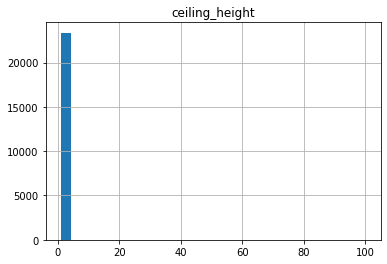

In [39]:
realty.hist(['ceiling_height'],bins = 30,range = (realty['ceiling_height'].min(),realty['ceiling_height'].max()))

На этом графике видно, что есть значения до 100м. Это явная ошибка в данных. Исследую этот вопрос. <div class="alert alert-block alert-info">Построю диаграмму с ограничениями по оси X.</div>

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

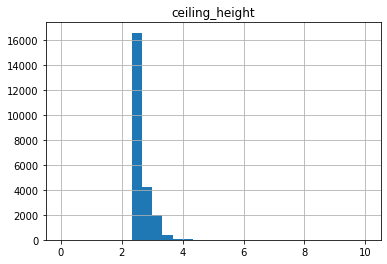

In [40]:
realty.hist(['ceiling_height'],bins = 30,range = (0,10))

Видно, что большая часть значений лежит в промежутке от 2.5 до 4 метров. Остальные выбросы можно удалить, если не получится их исправить логически.

 Построю диаграмму размаха.

<AxesSubplot:>

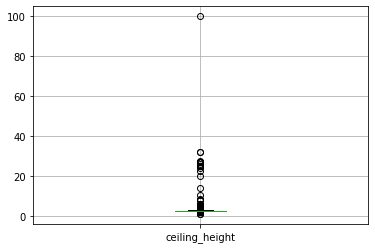

In [41]:
realty.boxplot('ceiling_height')

Видно, что есть единственный явный выброс - 100м. Удалим его.

<AxesSubplot:>

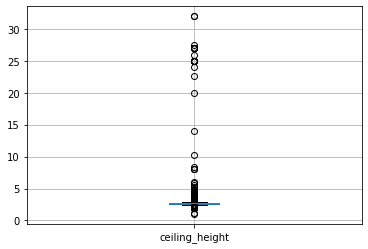

In [42]:
realty = realty.query('ceiling_height < 100') #удаляем значение 100м
realty = realty.reset_index(drop = True) #выравниваем индексы
realty.boxplot('ceiling_height') #строим снова диаграмму размаха

Теперь видно, что есть еще выбросы. Часть из них (от 20 до 40) возможно возникли из-за ошибки ввода данных, просто забыли запятую в десятичном числе. Исправим это. 

<AxesSubplot:>

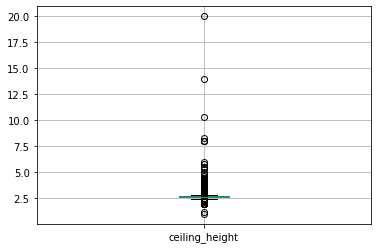

In [43]:
i=0
for ceiling in realty['ceiling_height']:
    if ceiling > 20:
        realty.loc[i,'ceiling_height'] = ceiling * 0.1
    i+=1

realty.boxplot('ceiling_height')

Теперь стали видны еще явные выбросы, т.к. вряд ли в квартирах есть высота потолков от 7.5м до 20м. И объяснить их логически нельзя. Поэтому удалим их. Посчитаем процент удалений.

In [44]:
realty_percent = realty.query('ceiling_height < 7.5')

#проверка сколько данных удалили от изначального объема данных
percent(realty_percent) 


Процент удаленных строк на данный момент:  1.274315371956618 %


In [45]:
realty = realty_percent

<AxesSubplot:>

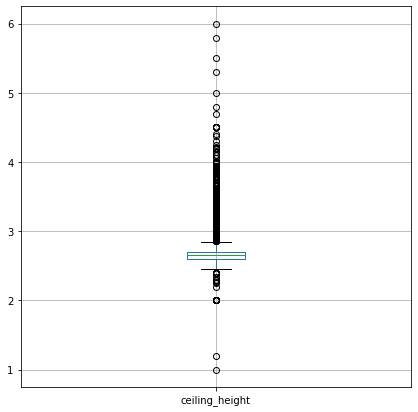

In [46]:
realty = realty.reset_index(drop = True)
realty.boxplot('ceiling_height',figsize = (7,7))

И снова видны выбросы - те значения, которые лежат за пределами "ящика с усами". Значений в промежутках (0;2.45] и [3.75;6] мало. Тем более такая высота потолков вряд ли возможна для квартир. Удалим их. Проверяем процент удалений.

In [47]:
realty_percent = realty.query('ceiling_height < 3.75')
realty_percent = realty_percent.query('ceiling_height >= 2.45')

#проверка сколько данных удалили от изначального объема данных
percent(realty_percent)

Процент удаленных строк на данный момент:  1.9958648044221263 %


In [48]:
realty = realty_percent

<AxesSubplot:>

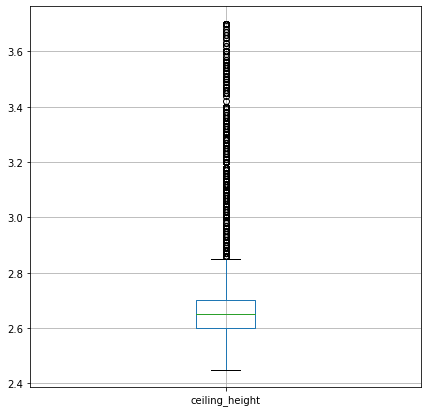

In [49]:
realty = realty.reset_index(drop = True)
realty.boxplot('ceiling_height',figsize = (7,7))

Видно, что остались значения, выходящие за пределы "ящика с усами", но я считаю, что их нужно оставить, т.к. квартиры с потолками до 3.75 м бывают довольно часто. Это не ошибка в данных. Поэтому оставим их для исследования.

In [50]:
realty['ceiling_height'].describe()

count    23226.000000
mean         2.687017
std          0.185622
min          2.450000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.700000
Name: ceiling_height, dtype: float64

Из этих числовых характеристик видно, что стандартное отклонение маленькое, минимальное и максимальное значение выглядят приемлемо, 75% данных имеет значение меньше 2.7м.

Думаю в таком виде столбец "Высота потолков" можно оставить. 

<h4> Исследуем столбец "Цена квартиры"

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

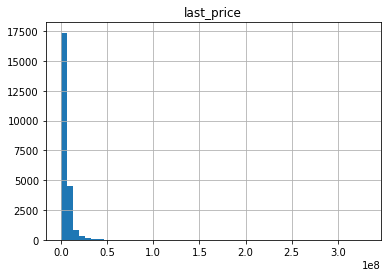

In [51]:
realty.hist(['last_price'],bins = 50, range = (realty['last_price'].min(),realty['last_price'].max()))

Квартир, которые стоят дороже 40 млн рублей, очень мало. Поэтому удалим эти данные. Продолжаем контролировать процент удаленных строк.

In [52]:
realty_percent = realty.query('last_price < 4*10**7')

#проверка сколько данных удалили от изначального объема данных
percent(realty_percent)

Процент удаленных строк на данный момент:  2.413603949533737 %


In [53]:
realty = realty_percent

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

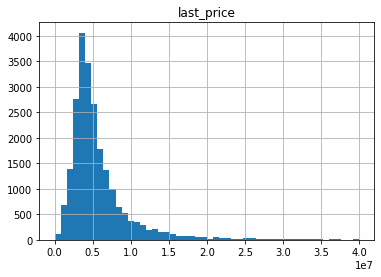

In [54]:
realty.hist(['last_price'],bins = 50, range = (realty['last_price'].min(),realty['last_price'].max()))

<div class="alert alert-block alert-info">
Поработала с выбросами и аномалиями в столбцах ceiling_height и last_price. 
    
В столбце Высота потолка явные ошибки исправила, явные выбросы удалила. 
    
В столбце Цена объекта удалила выбросы. Теперь данные в этих столбцах выглядят разумно. 
    
На данный момент удалено 2.41% строк.
</div>

<h4> Исследую столбец "Тип этажа квартиры"

Тип этажа квартиры - первый этаж, последний этаж, другой этаж. 
Воспользуюсь функцией plot и построю столбчатую диаграмму. Для этого сгруппирую данные из столбца type_floor.

<AxesSubplot:xlabel='type_floor'>

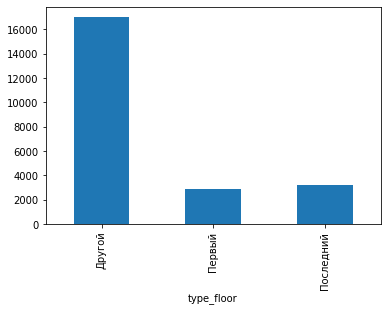

In [55]:
realty.groupby('type_floor')['type_floor'].count().plot(kind = 'bar')

<div class="alert alert-block alert-info">
Данные в столбце "Тип этажа квартиры" не требуют удалений или обработки аномальных значений. Все выглядит нормально.
</div>

<h4> Исследую столбцы "Расстояние до центра города в м" и "Расстояние до ближайшего парка" 

Построю гистограммы для этих столбцов.

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

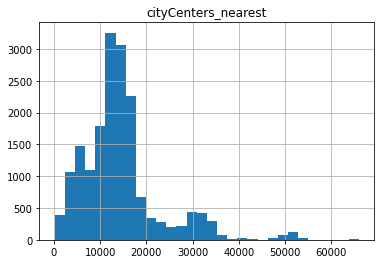

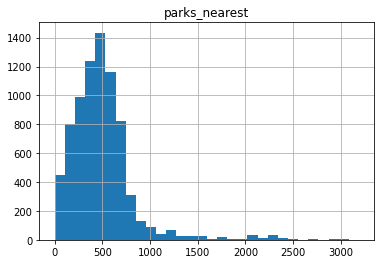

In [56]:
realty.hist(['cityCenters_nearest'],bins = 30, range = (realty['cityCenters_nearest'].min(),realty['cityCenters_nearest'].max()))
realty.hist(['parks_nearest'],bins = 30,range = (realty['parks_nearest'].min(),realty['parks_nearest'].max()))

<div class="alert alert-block alert-info">
Думаю, что в столбце "Расстояние до центра города в м" можно удалить значения удаленности от центра свыше 55км.

В столбце "Расстояние до ближайшего парка" большая часть значений лежит в промежутке (0;2500)
Поэтому значения больше 2500м удалю. Продолжаю контролировать процент удаленных строк</div>
    

In [57]:
realty_percent = realty.loc[(realty['cityCenters_nearest'] < 55000) | (realty['cityCenters_nearest'].isnull())]
realty_percent = realty_percent.loc[(realty_percent['parks_nearest'] < 2500) | (realty_percent['parks_nearest'].isnull())]

#проверка сколько данных удалили от изначального объема данных
percent(realty_percent)

Процент удаленных строк на данный момент:  2.5317523946158076 %


In [58]:
realty = realty_percent

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

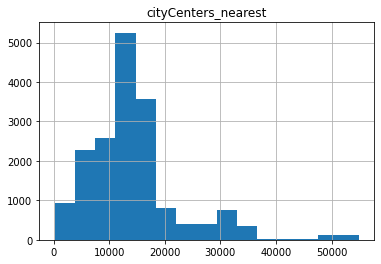

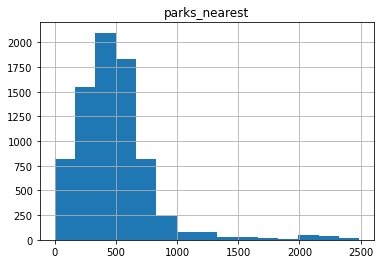

In [59]:
realty.hist(['cityCenters_nearest'],bins = 15,range = (realty['cityCenters_nearest'].min(),realty['cityCenters_nearest'].max()))
realty.hist(['parks_nearest'],bins = 15,range = (realty['parks_nearest'].min(),realty['parks_nearest'].max()))

In [60]:
realty.info() #посмотрим на окончательную информацию о данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23099 entries, 0 to 23225
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23099 non-null  int64         
 1   last_price              23099 non-null  float64       
 2   total_area              23099 non-null  float64       
 3   first_day_exposition    23099 non-null  datetime64[ns]
 4   rooms                   23099 non-null  int64         
 5   ceiling_height          23099 non-null  float64       
 6   floors_total            23099 non-null  float64       
 7   living_area             23099 non-null  float64       
 8   floor                   23099 non-null  int64         
 9   is_apartment            23099 non-null  bool          
 10  studio                  23099 non-null  bool          
 11  open_plan               23099 non-null  bool          
 12  kitchen_area            23099 non-null  float6

**Я поработала с основным количеством числовых столбцов.**

**Обработала выбросы и аномальные значения.**

**Удалила минимальное количество данных (2.53% от начального объема данных).**

**Теперь можно приступать к выявлению зависимостей.**

<h4> Изучим, как быстро продавались квартиры

Построю гистограмму для столбца days_exposition.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

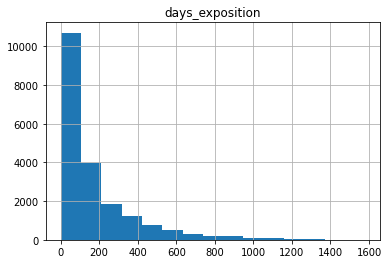

In [61]:
realty.hist(['days_exposition'],bins = 15,range = (realty['days_exposition'].min(),realty['days_exposition'].max()))

Найду среднее и медианное значения.

In [62]:
days_mean = realty['days_exposition'].mean()
days_median = realty['days_exposition'].median()
print('Среднее', days_mean.round(2), 'Медиана', days_median)

Среднее 179.21 Медиана 95.0


Посмотрю дополнительно числовые характеристики исследуемого столбца.

In [63]:
realty['days_exposition'].describe()

count    20038.000000
mean       179.206807
std        218.051807
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем продажа квартиры занимает 178 дней (полгода), но это значение нельзя считать верным, потому что половина всех продаж происходит менее чем за 94 дня (3 месяца).

Думаю быстрыми продажами можно считать те, которые происходят в течение 45 дней (1.5 месяца), а необычно долгие продажи - свыше 228 дней (8 месяцев)

<h4> Изучим, какие факторы влияют на полную стоимость объекта

Вычислю коэффициент корреляции и построю диаграммы рассеяния для значений **из столбца 'last_price', и столбцов 'total_area', 'living_area', 'kitchen_area'**

In [64]:
#коэффициент корреляции Пирсона между общей стоимостью квартиры и общей площадью
realty['last_price'].corr(realty['total_area'])

0.7803612339386465

In [65]:
#коэффициент корреляции Пирсона между общей стоимостью квартиры и жилой площадью
realty['last_price'].corr(realty['living_area'])

0.649100408407806

In [66]:
#коэффициент корреляции Пирсона между общей стоимостью квартиры и площадью кухни
realty['last_price'].corr(realty['kitchen_area'])

0.5725283862330555

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

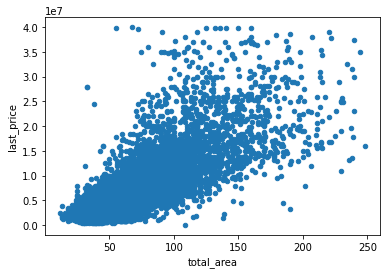

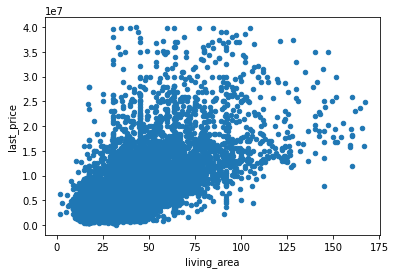

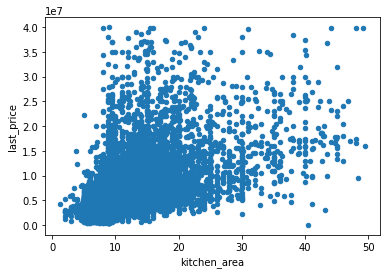

In [67]:
realty.plot(x = 'total_area', y = 'last_price', kind = 'scatter')
realty.plot(x = 'living_area', y = 'last_price', kind = 'scatter')
realty.plot(x = 'kitchen_area', y = 'last_price', kind = 'scatter')

Посмотрев на диаграммы рассеяния, а также вычислив коэффициент корреляции, можно сказать, что общая стоимость квартиры зависит от общей, жилой и площади кухни. И каждая из этих зависимостей - прямая: чем больше указанная площадь, тем выше цена объекта. 

Исходя из коэффициента корреляции понятно, что от общей площади зависимость сильнее, чем от жилой, и тем более от площади кухни.

Из графиков видно, что зависимость сильнее при значениях общей площади до 150 м2, жилой площади до 80 м2, площади кухни до 20 м2. Далее зависимость становится не такой явной. Думаю на общую стоимость влияют и другие факторы.

<div class="alert alert-block alert-info">
Посмотрю, как влияют на полную стоимость квартиры такие факторы, как количество комнат и дата размещения объявления о продаже.  

    Изучу данные из столбцов 'rooms', 'weekday', 'month', 'year'
    
</div>

<div class="alert alert-block alert-info">
Построю диаграммы для значений из столбца 'last_price' и столбцов 'rooms', 'weekday', 'month', 'year'
    
На этих графиках отражу медианную цену общей стоимости квартиры, в зависимости от числа комнат, от дня недели, месяца и года размещения объявления.
</div>

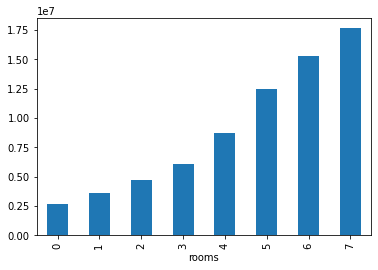

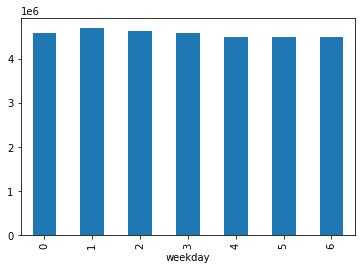

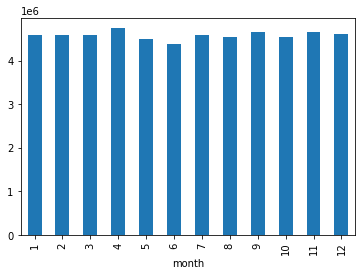

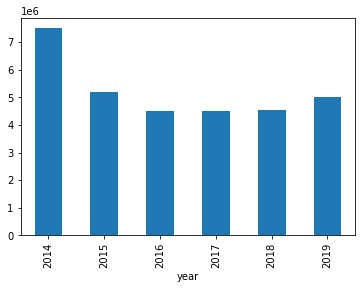

In [68]:
realty.groupby('rooms')['last_price'].median().plot(kind = 'bar')
plt.show()
realty.groupby('weekday')['last_price'].median().plot(kind = 'bar')
plt.show()
realty.groupby('month')['last_price'].median().plot(kind = 'bar')
plt.show()
realty.groupby('year')['last_price'].median().plot(kind = 'bar')
plt.show()

<div class="alert alert-block alert-info">
По построенным графикам можно сделать следующие выводы:

* Цена на квартиру зависит от числа комнат. Чем больше комнат, тем дороже квартира
* Цена на квартиру не зависит от дня недели и месяца размещения объявления.
* Цена на квартиру зависит от года, когда выставлена на продажу. Самые дорогие квартиры были в 2014 году. В 2015 году цены  значительно снизились. В 2016, 2017, 2018 цены были более-менее стабильны. В 2019 наблюдается небольшой рост цен.
    
</div>

Построю диаграмму для значений **из столбца 'last_price' и столбца 'type_rooms'**

На графике отражу среднюю цену общей стоимости квартиры, которая расположена на первом, последнем или другом этаже.

<AxesSubplot:xlabel='type_floor'>

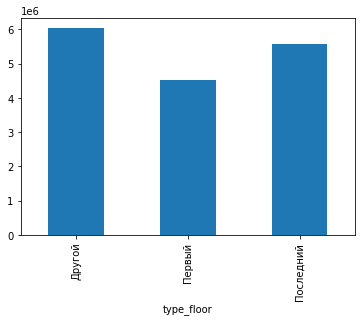

In [69]:
realty.groupby('type_floor')['last_price'].mean().plot(kind = 'bar')

Из графика видно, что средняя цена за квартиру на первом этаже самая низкая. Квартиры на любом этаже, кроме первого стоят в среднем одинаково, но на последнем этаже чуть дешевле.

<h4> Изучим среднюю стоимость 1 кв.м объекта в 10 населенных пунктах

Возьмем 10 населенных пунктов с наибольшим числом объявлений. Для этого построим сводную таблицу:
* населенный пункт
* количество объявлений
* средняя цена 1 кв.м

In [70]:
locality_10 = realty.pivot_table(
                     index = 'locality_name',
                     values = 'price_m2', 
                     aggfunc = ('count','mean')
                    ).sort_values(by = 'count', ascending = False).head(10)

locality_10

,count,mean
locality_name,,
Санкт-Петербург,15206,111373.310399
Мурино,585,86040.789932
Кудрово,469,95261.963412
Шушары,438,78528.744977
Всеволожск,395,68617.058810
Пушкин,357,102706.439552
Колпино,336,75352.475595
Парголово,327,90175.913089
Гатчина,306,68799.627549


Выделим из таблицы два населенных пункта.

* Первый с минимальной стоимостью 1 кв.м.
* Второй с максимальной стоимостью 1 кв.м.

In [82]:
locality_10.loc[locality_10['mean'] == locality_10['mean'].min()]

,count,mean
locality_name,,
Выборг,232,58243.12056


In [83]:
locality_10.loc[locality_10['mean'] == locality_10['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,15206,111373.310399


<AxesSubplot:xlabel='locality_name'>

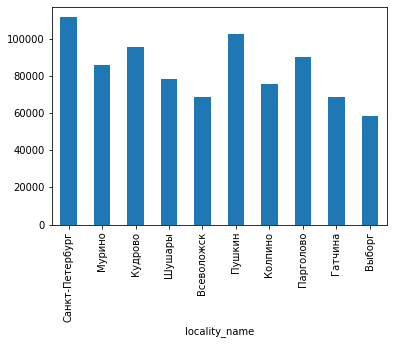

In [84]:
locality_10['mean'].plot(kind = 'bar')

<div class="alert alert-block alert-info">
Я изучила среднюю стоимость 1 кв.м в 10 населенных пунктах с наибольшим числом объявлений.
    
По графику и сводной таблице можно сделать следующие выводы:
    
* Цена 1 кв.м квартиры зависит от населенного пункта, где расположна квартира
* Самый дорогой квадратный метр в Санкт-Петербурге, самый дешевый - в Выборге. Разница почти в 2 раза.

</div>

<h4> Исследуем среднюю стоимость объекта в зависимости от удаленности от центра Санкт-Петербурга

In [85]:
distance_Spb = realty.loc[realty['locality_name'] == 'Санкт-Петербург'] #выделила строки с данными о Санкт-Петербурге
distance_price = distance_Spb.groupby('cityCenters_nearest_km')['last_price'].mean() #сгруппировала по километражу удаленности от центра и нашла среднее значение цены квартиры

Построим график

<AxesSubplot:xlabel='Расстояние, км', ylabel='Стоимость квартиры'>

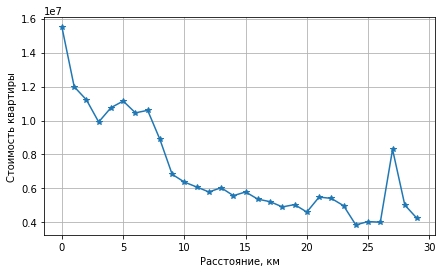

In [86]:
distance_price.plot(
               x = distance_price.index, 
               y = 'cityCenters_nearest_km', 
               grid = True,
               figsize = (7,4),
               style = '*-',
               xlabel = 'Расстояние, км',
               ylabel = 'Стоимость квартиры'
)

**По графику видно, что стоимость квартиры падает при удалении ее от центра города. Самые дорогие квартиры в центре города.**

Единственный момент, который виден на графике - резкий рост средней стоимости квартиры (с 4 млн рублей до 8 млн рублей) при удаленности от центра 27 км. 

Посмотрим на значения в таблице в тех строках, где расстояние от центра равно 27 км.

In [87]:
distance_Spb.loc[distance_Spb['cityCenters_nearest_km'] == 27 ]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,type_floor,cityCenters_nearest_km
729,13,14350000.0,74.0,2017-11-28,2,3.13,5.0,30.0,3,False,...,1496.0,0,NaN,128.0,193918.92,1,11,2017,Другой,27.0
5833,6,2250000.0,32.0,2018-02-27,1,2.65,2.0,16.5,2,False,...,NaN,0,NaN,178.0,70312.50,1,2,2018,Последний,27.0


Что мы видим:

*Во-первых,* средняя цена за квартиру посчитана всего по двум значениям. Этого очень мало. Необходимо собрать еще данных в эту категорию.

*Во-вторых,* цена одного из объектов 14 млн рублей, при том, что квартира двухкомнатная, небольшая, ничем не выдающаяся. Даже в центре города квартиры подобного метража столько не стоят. Поэтому я вижу две возможности, откуда взялась такая цена:
- цену завысил продавец
- эта квартира в каком-нибудь элитном районе, элитном доме или каком-то дорогом, может историческом месте

Как бы то ни было, данных в категории 27 км недостаточно, и это ообъясняет резкий скачок среднего значения.



**Исследую еще одну зависимость: цену квадратного метра жилья от удаленности от центра в километрах.**

<AxesSubplot:xlabel='Расстояние, км', ylabel='Стоимость 1 кв.м'>

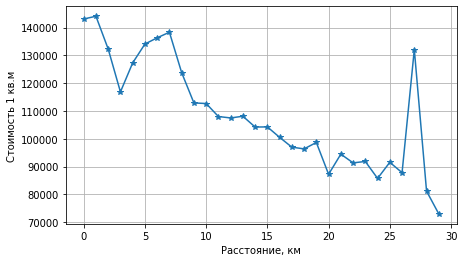

In [88]:
distance_m2 = distance_Spb.groupby('cityCenters_nearest_km')['price_m2'].mean()
distance_m2.plot(
               x = distance_m2.index, 
               y = 'cityCenters_nearest_km', 
               grid = True,
               figsize = (7,4),
               style = '*-',
               xlabel = 'Расстояние, км',
               ylabel = 'Стоимость 1 кв.м'
)

Тренд на снижение стоимости квадратного метра при удалении от центра виден на графике.

Здесь тоже виден тот скачок стоимости квадратного метра при удаленности от центра 27 км. Он образуется по той же причине, что описана выше (недостаточно данных и одно из значений сильно завышено)

Еще на этом графике виден рост стоимости 1 кв.м при удаленности от центра от 4 км до 7 км. На предыдущем графике этот рост тоже виден, но не так явно.

Я плохо знаю как устроен рынок недвижимости в мегаполисе, но могу предположить, что такой рост цен связан с тем, что на удалении от центра 4-7 км находится или спальный район, или район офисов. И в том, и в том случае повышенный спрос на жилье в этих районах будет влиять на повышение цены.

<div class="alert alert-block alert-info">
<h3> Вывод:  <a class="tocSkip"></h3> 
    
    Я провела исследовательский анализ данных. 
    На этом этапе:
* удалила аномальные значения, выбросы и ошибки человеческого фактора, привела данные к адекватному виду.
* изучила, как быстро продаются квартиры; какие продажи аномально быстрые или, наоборот, долгие; нашла, сколько времени обычно занимает продажа квартиры
* определила факторы, которые больше всего влияют на стоимость квартиры
* посчитала среднюю цену за квадратный метр в 10 населенных пунктах с наибольшим числом объявлений; нашла минимальную и максимальную цену за 1 кв.м
* исследовала среднюю цену квартир в зависимости от удаленности от центра города   
    
    
</div>

### Напишите общий вывод

Проведено исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет.
Для проведения исследования был получен датасет, в котором содержалась информация, часть которой заполняли продавцы, часть была заполнена с помощью геосервисов.
*

**Сначала я провела предобработку данных.** 
    
    Вот с какими проблемами в данных я столкнулась:
 - *Пропущенные значения в некоторых столбцах. Я с ними справилась следующим образом:*
    
    * В столбце "Название населенного пункта" пропуски заменила на "unknown" (чтобы не потерять данные)
    * В столбце "Количество балконов" пропуски заменила на 0 (раз люди не указали, то скорее всего балконов нет)
    * В столбцах "Число парков рядом", "Число водоемов рядом" пропущенные значения заполнила 0 (эти данные получены из геосервисов, раз они не смогли их заполнить, то логично предположить, что этих объектов нет рядом)
    * В столбце "Апартаменты" пропуски заполнила False (думаю те, кто хотел продать апартаменты обязательно указал эту информацию, т.к. это важно для продажи)
    * В столбцах "Высота потолка" и "Этажность дома" пропуски заполнила медианными значениями.
    * В столбцах "Жилая площадь" и "Площадь кухни" для заполнения пропусков сгруппировала данные по количеству комнат в квартире, нашла медианное значение для каждой группы и этими значениями заполнила соответствующие пропуски
    * В столбцах "Расстояние до аэропорта", "Расстояние до центра города", "Расстояние до парка", "Расстояние до водоема" "Сколько дней было размещено объявление" логичным образом заполнить пропуски не смогла, т.к. не хватает данных (например, нужны координаты расположения квартиры, чтобы вычислить расстояние до аэропорта и центра города, а также нужна дата снятия объявления, чтобы вычислить количество дней размещения объявления). Поэтому в этих столбцах пропуски оставила.
    
- *Неверный тип данных в некоторых столбцах, а так же присутствие дубликатов*
    * В столбцах Количество балконов", "Этажность дома","Число парков рядом", "Число водоемов рядом","Сколько дней было размещено объявление" тип данных привела к целочисленному (int)
    * В столбце "Дата публикации" привела формат даты к стандартному.
    * В столбце "Название населенного пункта" избавилась от дубликатов.
    
    
*Думаю проблемы с пропусками в данных, типом формата и дубликатами возникли как из-за человеческого фактора, так и из-за работы геосервисов.* 
    
**Далее для исследования я добавила несколько столбцов:**

    * цена 1 кв.м
    * день недели публикации объявления
    * месяц публикации объявления
    * год публикации объявления
    * тип этажа квартиры (первый, последний, другой)
    * расстояние до центра города в километрах

**Потом я исследовала данные на присутствие выбросов и аномальных значений**

    При обнаружении выбросов и аномалий я или удаляла их, или логически исправляла.
    Вот как я с этим работала:
    
   * Построила гистограммы для столбцов "Общая площадь", "Жилая площадь", "Площадь кухни", "Этажность дома", "Количество комнат", "Цена объекта", "Расстояние до парка", "Расстояние до центра города". 
   * По гистограммам увидела, где лежит основная масса значений, остальные данные я удалила. В итоге оставила значения, где "Общая площадь" < 250, "Жилая площадь" < 170, "Площадь кухни" < 50, "Этажность дома" < 30, "Количество комнат" < 8, "Цена объекта" < 40 млн, "Расстояние до парка" < 2500, "Расстояние до центра города" < 55000.  
   * Построила гистограммы для столбцов "Тип этажа квартиры". Здесь аномалий и выбросов я не увидела. Оставила данные как есть.
   * Построила гистограмму для столбца "Высота потолка". Первое, что бросилось в глаза - выброс - высота 100м. Я его удалила. Потом я строила диаграмму размаха. Выбросы значений от 20 до 40 перевела в значения от 2.0 до 4.0. После этого оставила только те значения высоты потолков, которые попадают в промежуток (2.45;3.75)
   
*Думаю выбросы и аномалии возникли из-за человеческого фактора (невнимательность при заполнении данных). А так же есть выбросы, связанные с редкими, но реальными объектами (огромные площади квартир, завышенные цены за объекты по каким-то объективным причинам и т.п.). Удаление таких выбросов не повлияет на исследование.
   
**Далее я приступила к исследовательскому анализу очищенных данных**
1. Исследовала, как быстро продаются квартиры.
   
   *Вывод:* 
    - половина квартир продаются в течение 3 месяцев
    - быстрая продажа квартиры происходит за 1.5 месяцев
    - долгая продажа квартир -  дольше 8 месяцев
    - в среднем квартиры продаются в течение полугода
    
2. Исследовала, какие факторы больше всего влияют на полную стоимость объекта.

    *Вывод:*
    - больше всего стоимость квартиры зависит от общей площади. Чем больше площадь, тем выше цена.
    - не такая явная, но есть прямая зависимость стоимости квартиры от жилой площади и площади квартиры.
    - от количества комнат есть прямая зависимость, чем больше комнат в квартире, тем дороже стоимость квартиры.
    - цена ниже на квартиры, расположенные на 1 этаже, чем на других этажах.
    - зависимости от дня и месяца размещения объявления никакой нет
    - зависимость от года есть, но неясно какие факторы на это влияют (политическая или экономическая ситуация в стране, изменения в законодательстве или еще что-то - надо проводить дополнительное исследование)
    
3. Исследовала среднюю цену за 1 кв.м в десяти населенных пунктах с наибольшим числом объявлений.

    *Вывод:*
    - самый дорогой квадратный метр в Санкт-Петербурге 
    - самый дешевый квадратный метр в Выборге (почти в 2 раза дешевле, чем в Санкт-Петербурге)
    
4. Исследовала, как стоимость квартир в Санкт-Перебурге зависит от расстояния до центра города.

    *Вывод:*
    - стоимость квартиры падает при удалении ее от центра города. Самые дорогие квартиры в центре города.
    - есть повышение стоимости квартир при удалении от центра 4 - 7 км. Возможно это связано с тем, что на таком удалении от центра построены спальные районы или районы с офисами. Повышенный спрос на такие квартиры повышает их стоимость.
    - на графике видно повышение цены при удаленности от центра 27 км. Данных о квартирах на этом удалении от центра недостаточно (их всего 2, причем у одной очень завышена цена). Поэтму этот пик не надо принимать в расчет до тех пор, пока не будут дополнены данные.
    
**После завершения исследования рынка недвижимости, я бы сделала следующие выводы:**
1. Цены на квартиры в первую очередь зависят от общей площади и от района (населенный пункт, удаленность от центра и т.п.)
2. Цена на квартиру зависит от числа комнат. Чем больше комнат, тем дороже. А так же от этажа, на котором расположена квартира - на первом этаже квартиры дешевле.
3. Есть зависимость цены на квартиру от года продажи, но для выяснения факторов, которые на нее влияют, нужны дополнительные исследования.
4. Должны настораживать продажи квартир быстрее 1.5 месяцев
5. На квартиры, которые продаются более 8 месяцев, нужно пересматривать цену
